# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [137]:
#import librar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
iris= load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [138]:
#Load datasets
import pandas as pd
idf =pd.DataFrame(iris.data, columns=iris.feature_names)


idf.head()



sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

Text(0, 0.5, 'petal width (cm)')

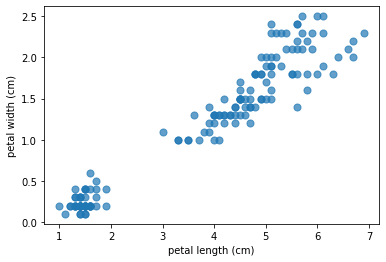

In [139]:
#visualize your data here
points = idf.iloc[:, 2:4].values
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

## <font color = blue> 3. Train model

In [140]:
#train your model here
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=3, random_state=0)

## <font color = blue> 4. Explore KMeans attributes

In [152]:
#check Kmean algorithm's attribute

predicted_cluster_indexes = kmeans.predict(points)

In [160]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [162]:
kmeans.n_iter_

6

In [164]:
kmeans.n_features_in_

2

## <font color = blue> 5. Prediction

In [154]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample=[[0.2,1]]



In [155]:
y_prd=kmeans.predict(x_sample)
y_prd

array([0])

## <font color = blue> 6. Plotting clusters with thier centroids

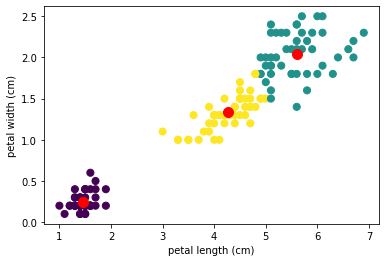

In [157]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
plt.scatter(x, y, c=predicted_cluster_indexes, s=50,)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)


## <font color = blue> 7. Use elbow method to choose K for Kmean

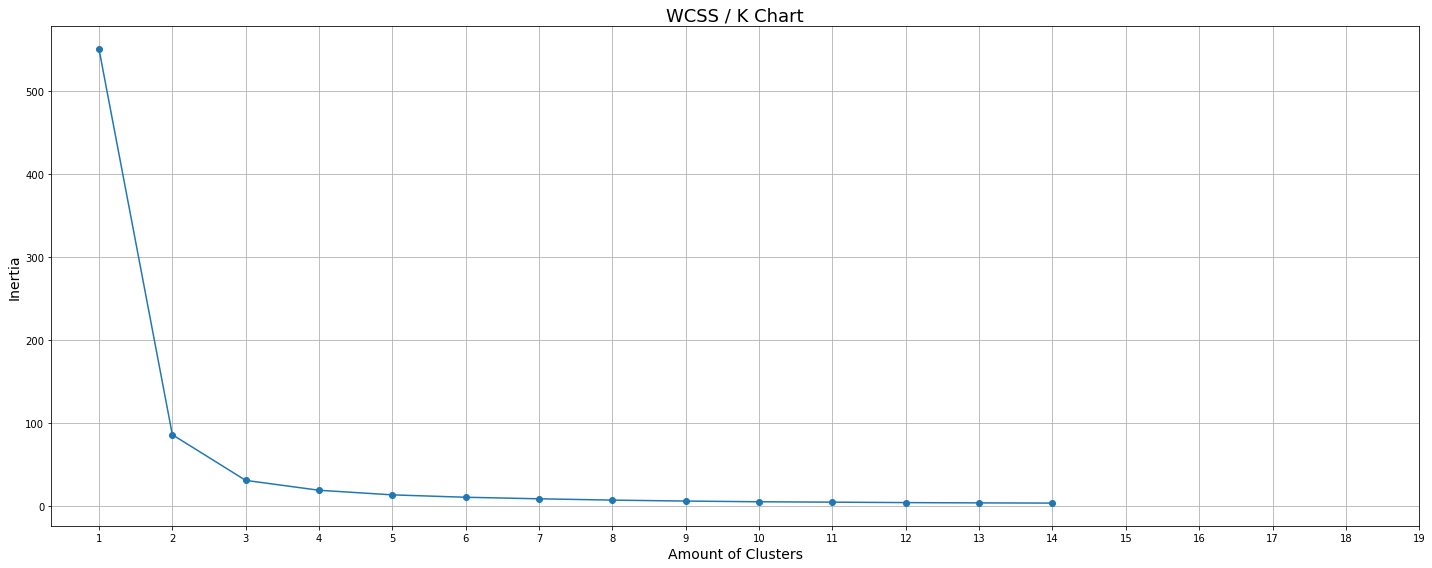

In [145]:
# plot grah to decide K value for given dataset.
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(points)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [146]:
from sklearn.metrics import silhouette_score
wss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(idf)
    score = silhouette_score(idf, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.6810461692117462
For cluster: 3, the silhouette score is: 0.5528190123564095
For cluster: 4, the silhouette score is: 0.49805050499728737
For cluster: 5, the silhouette score is: 0.48874888709310566
For cluster: 6, the silhouette score is: 0.3664804028900833
For cluster: 7, the silhouette score is: 0.3520074671616292
For cluster: 8, the silhouette score is: 0.3487345377219388
For cluster: 9, the silhouette score is: 0.3342251483322866


In [147]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=3, random_state=0)

In [148]:
predicted_cluster_indexes = kmeans.predict(points)

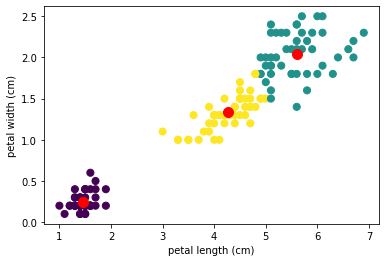

In [149]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50,)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [150]:
x_sample=[[0.2,1]]

In [151]:
y_prd=kmeans.predict(x_sample)
y_prd

array([0])